# 逻辑回归

In [1374]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


# Sigmoid函数

In [1375]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))


# 损失函数

In [1376]:
def compute_loss(X, y, w, b):
    m = X.shape[0]
    z = np.dot(X, w) + b
    h = sigmoid(z)
    loss = -np.mean(y * np.log(h + 1e-8) + (1 - y) * np.log(1 - h + 1e-8))
    return loss


# 梯度下降

In [1377]:
def compute_gradients(X, y, w, b):
    m = X.shape[0]
    z = np.dot(X, w) + b
    h = sigmoid(z)

    dw = np.dot(X.T, (h - y)) / m
    db = np.sum(h - y) / m
    
    return dw, db


In [1378]:
def gradient_descent(X, y, w_init, b_init, lr, num_iters):
    w = w_init.copy()
    b = b_init
    loss_history = []
    w_history = []
    b_history = []

    for i in range(num_iters):
        dw, db = compute_gradients(X, y, w, b)

        w -= lr * dw
        b -= lr * db

        loss = compute_loss(X, y, w, b)
        loss_history.append(loss)
        w_history.append(w.copy())
        b_history.append(b)

    return w, b, loss_history, w_history, b_history


# 生成数据并进行逻辑回归的拟合

$$y = w_1x_1 + w_2x_2 + b$$

In [1379]:
def generate_logistic_data(n_samples = 200, w_true = np.array([2, -3]), b_true = 0.5, seed = 42):
    np.random.seed(seed)

    X = np.random.randn(n_samples, 2)

    z = np.dot(X, w_true) + b_true
    p = sigmoid(z)

    y = (np.random.rand(n_samples) < p).astype(int)

    return X, y


In [1380]:
w_true = np.array([2, -3])
b_true = 0.5

X, y = generate_logistic_data(
    n_samples = 200,
    w_true = w_true,
    b_true = b_true,
)

In [1381]:
w_init = np.array([-5.0, 5.0])
b_init = 0
lr = 0.3
num_iters = 1000


In [1382]:
w_opt, b_opt, loss_history, w_history, b_history = gradient_descent(X, y, w_init, b_init, lr, num_iters)

In [1383]:
print(f"Fitted function: y = f(x) = {w_opt[0]:.2f} * x_1 + {w_opt[1]:.2f} * x_2 + {b_opt:.2f}")
print(f"The best fitted parameters are: \n w_1: {w_opt[0]:.2f} \n w_2: {w_opt[1]:.2f} \n b: {b_opt:.2f}")


Fitted function: y = f(x) = 2.50 * x_1 + -3.15 * x_2 + 0.49
The best fitted parameters are: 
 w_1: 2.50 
 w_2: -3.15 
 b: 0.49


# 可视化

In [1384]:
def plot_origin_data(X, y):
    plt.figure(figsize=(6, 5))
    plt.scatter(X[:, 0], X[:, 1], c = y, cmap = "bwr", edgecolors = "k")
    plt.xlabel("x1")
    plt.ylabel("x2")
    plt.title("The distribution of original data")
    plt.grid(True)
    plt.show()

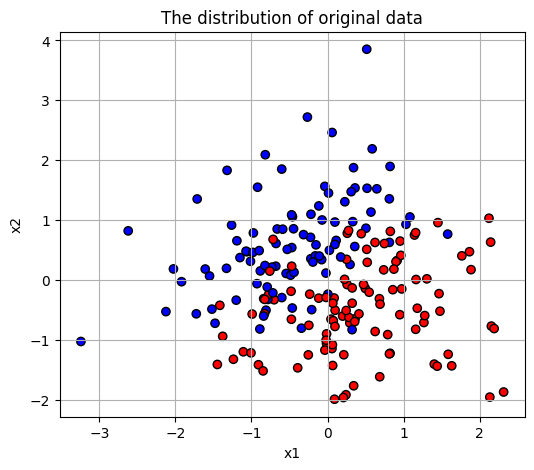

In [1385]:
plot_origin_data(X, y)

In [1386]:
def plot_decision_boundary(x, y, w, b):
    plt.figure(figsize = (8, 6))
    plt.scatter(x[:, 0], x[:, 1], c = y, cmap = "bwr", edgecolor = "k")
    
    x1 = np.linspace(x[:, 0].min(), x[:, 0].max(), 100)
    x2 = -(w[0] * x1 + b) / (w[1])
    
    plt.plot(x1, x2, "g-", linewidth = 2, label = "Decision boundary")
    plt.xlabel("x1")
    plt.ylabel("x2")
    plt.grid(True)
    plt.legend()
    plt.title("Logistic regression decision boundary")
    plt.show()


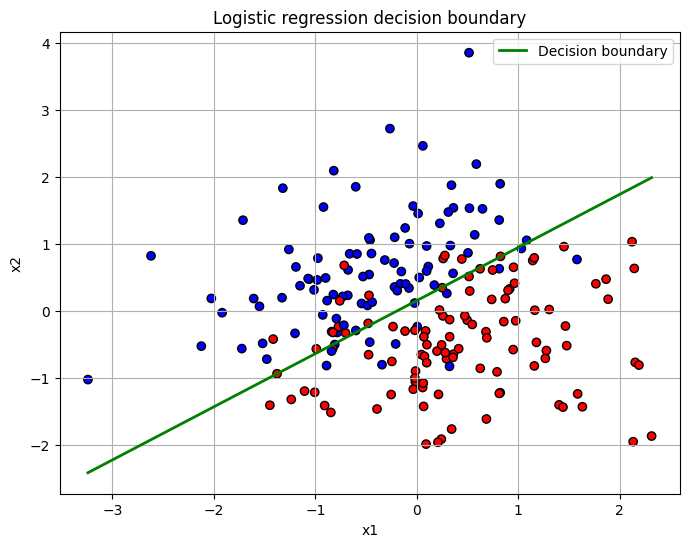

In [1387]:
plot_decision_boundary(X, y, w_opt, b_opt)

In [1388]:
def plot_loss_curve(loss_history):
    plt.figure()
    plt.plot(loss_history, "b-")
    plt.xlabel("Iterations")
    plt.ylabel("Loss")
    plt.title("Loss function downward curve")
    plt.grid(True)
    plt.show()


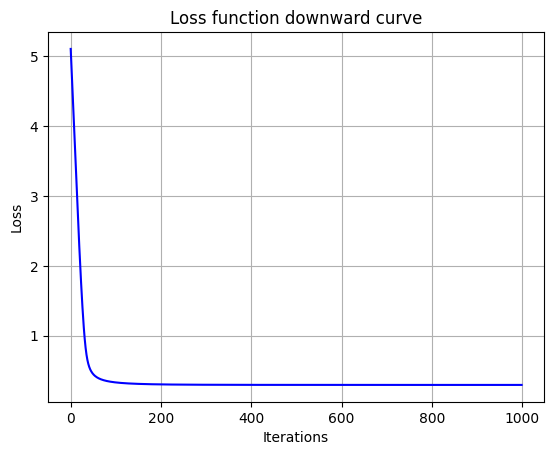

In [1389]:
plot_loss_curve(loss_history)

In [1390]:
def plot_param_curve(w_history, b_history):
    w_history = np.array(w_history)
    plt.figure()
    plt.plot(w_history[:, 0], label = "w1")
    plt.plot(w_history[:, 1], label = "w2")
    plt.plot(b_history, label = "b")

    plt.xlabel("Iterations")
    plt.ylabel("Parameter's value")
    plt.legend()
    plt.title("Parameter change with iteration")
    plt.grid(True)
    plt.show()
    

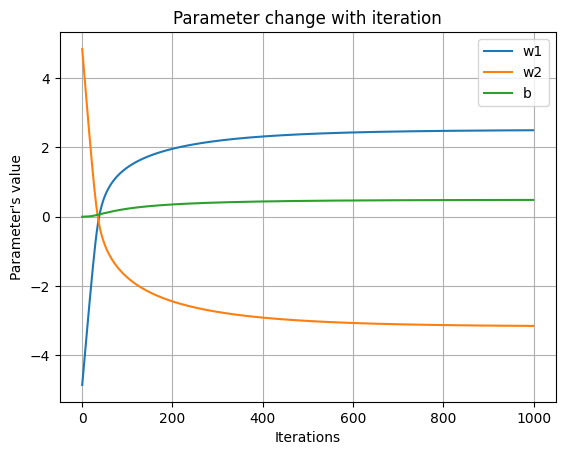

In [1391]:
plot_param_curve(w_history, b_history)

In [1392]:
def plot_2d_loss_contour(X, y, w_history, loss_history, b):
    w1_path = np.array([w[0] for w in w_history])
    w2_path = np.array([w[1] for w in w_history])

    w1_range = np.linspace(-5, 20, 100)
    w2_range = np.linspace(-20, 5, 100)
    W1, W2 = np.meshgrid(w1_range, w2_range)

    Loss = np.zeros_like(W1)

    for i in range(W1.shape[0]):
        for j in range(W1.shape[1]):
            w = np.array([W1[i, j], W2[i, j]])
            Loss[i, j] = compute_loss(X, y, w, b)

    plt.figure(figsize=(8, 6))
    contour = plt.contourf(W1, W2, Loss, levels = 30, cmap = "viridis")
    plt.colorbar(contour, label = "Loss")

    # 画参数路径
    plt.plot(w1_path, w2_path, color = "red", linestyle = "-", linewidth = 0.7, marker = "o", markersize = 1, label = "Gradient descent path")
    plt.scatter([w1_path[-1]], [w2_path[-1]], c = "gold", s = 80, marker = "o", label = f"Best fitted point: w_1={w1_path[-1]:.2f}, w_2={w2_path[-1]:.2f}, b={b_opt:.2f}, Loss={loss_history[-1]:.2f}")

    plt.xlabel("w1")
    plt.ylabel("w2")
    plt.title("Logistic regression 2D contour")
    plt.legend()
    plt.tight_layout()
    plt.grid(True)
    plt.show()

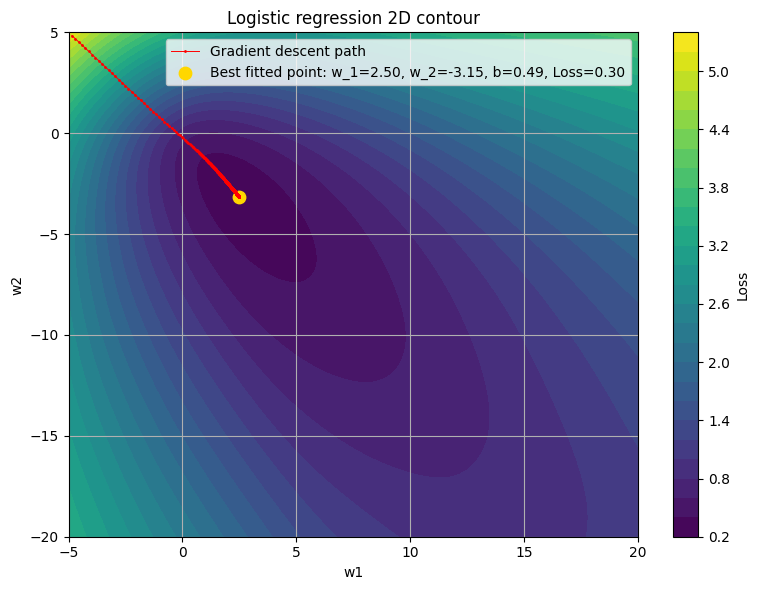

In [1393]:
plot_2d_loss_contour(X, y, w_history, loss_history, b_opt)

In [1394]:
def plot_3d_loss_contour(X, y, w_history, loss_history, b):
    w1_path = np.array([w[0] for w in w_history])
    w2_path = np.array([w[1] for w in w_history])
    loss_path = np.array(loss_history)
    
    w1_range = np.linspace(-5, 20, 100)
    w2_range = np.linspace(-20, 5, 100)

    W1, W2 = np.meshgrid(w1_range, w2_range)

    Loss = np.zeros_like(W1)

    for i in range(W1.shape[0]):
        for j in range(W1.shape[1]):
            w = np.array([W1[i, j], W2[i, j]])
            Loss[i, j] = compute_loss(X, y, w, b)

    fig = plt.figure(figsize=(12, 8))
    ax = fig.add_subplot(111, projection = "3d")
    surf = ax.plot_surface(W1, W2, Loss, cmap = "viridis", alpha = 0.7)
    fig.colorbar(surf, ax = ax, shrink = 0.5, aspect = 12, label = "Loss")

    ax.plot(w1_path, w2_path, loss_path, color = "red", linestyle = "-", linewidth = 2, marker = "o", markersize = 5, label = "Gradient descent Path")
    ax.scatter([w1_path[-1]], [w2_path[-1]], [loss_path[-1]], c = "gold", s = 100, marker = "o", label = f"Best fitted point: w_1={w1_path[-1]:.2f}, w_2={w2_path[-1]:.2f}, b={b_opt:.2f}, Loss={loss_path[-1]:.2f}")

    ax.contour(W1, W2, Loss, 40, offset = Loss.min() - 0.5, cmap = "viridis", linestyles = "solid", linewidths = 1.5, alpha = 0.8)

    ax.set_xlabel("W1")
    ax.set_ylabel("W2")
    ax.set_zlabel("Loss", labelpad = 1)
    ax.set_title("Loss contour plot with path", fontsize = 20)

    plt.legend(loc = "upper left")
    plt.tight_layout()
    plt.grid(True)
    plt.show()
    

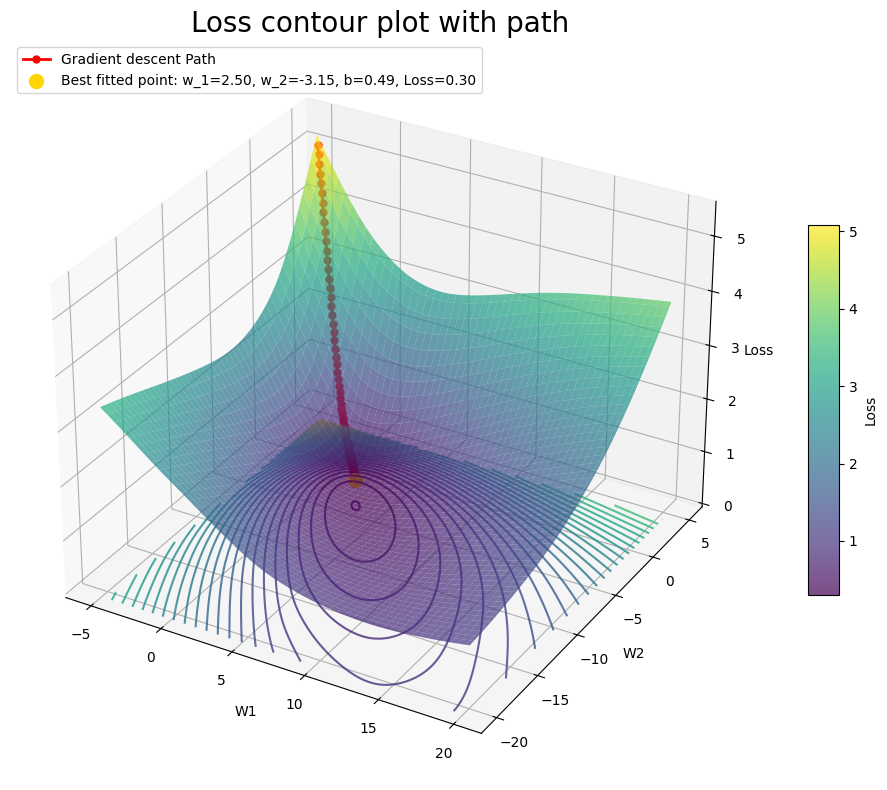

In [1395]:
plot_3d_loss_contour(X, y, w_history, loss_history, b_opt)

In [1396]:
print(f"Fitted function: y = f(x) = {w_opt[0]:.2f} * x_1 + {w_opt[1]:.2f} * x_2 + {b_opt:.2f}")
print(f"The best fitted parameters are: \n w_1: {w_opt[0]:.2f} \n w_2: {w_opt[1]:.2f} \n b: {b_opt:.2f}")


Fitted function: y = f(x) = 2.50 * x_1 + -3.15 * x_2 + 0.49
The best fitted parameters are: 
 w_1: 2.50 
 w_2: -3.15 
 b: 0.49
